## Imports

In [1]:
import numpy as np

from PIL import Image as PillowImage  # type: ignore
import cv2
from skimage import io as skimage_io
from tinylang.images import Image
from tinylang.messages import UserMessage
from tinylang.memory import ConversationMemory
from tinylang.llms import OpenAI
from matplotlib import pyplot as plt

### Loading a sample image to be passed into the model

In [2]:
pillow_image = PillowImage.open("image.png")
pillow_image

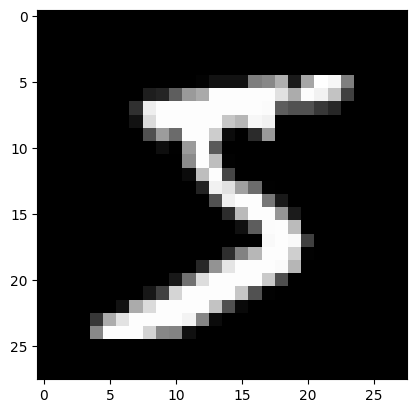

In [3]:
np_image = np.array(pillow_image)
plt.imshow(np_image, cmap="gray");

#### Different formats are also supported

In [4]:
cv2_image = cv2.imread("image.png")
skimage_image = skimage_io.imread("image.png")
bytes_image = open("image.png", "rb").read()

### Pass in the image to a UserMessage

#### Using the Image class - pass in a np array

In [5]:
user_image = Image(np_image)

##### Or, use the from_x method to create an Image object

In [6]:
user_image = Image.from_numpy(np_image)
user_image = Image.from_pillow(pillow_image)
user_image = Image.from_opencv(cv2_image)
user_image = Image.from_skimage(skimage_image)
user_image = Image.from_bytes(bytes_image)

In [7]:
UserMessage(content="Hello I have this image", image=user_image)

UserMessage(user, Hello I have this image, tinylang.images.Image object of size: (28, 28))

## Use with OpenAI 

In [8]:
memory = ConversationMemory()

memory.add_user_message("Hello how are you?")
memory.add_assistant_message("I am good thanks")
memory.add_message(UserMessage(content="What is this?", image=user_image))

In [9]:
memory.format_messages()

[{'role': 'user', 'content': 'Hello how are you?'},
 {'role': 'assistant', 'content': 'I am good thanks'},
 {'role': 'user',
  'content': 'What is this?',
  'image': <tinylang.images.image.Image at 0x29741b9d0>}]

In [10]:
chatGPT = OpenAI(
    model="gpt-3.5-turbo", openai_organization="", openai_api_key="", memory=memory
)
chatGPT.chat("What is this?", image=user_image)

AuthenticationError: You didn't provide an API key. You need to provide your API key in an Authorization header using Bearer auth (i.e. Authorization: Bearer YOUR_KEY), or as the password field (with blank username) if you're accessing the API from your browser and are prompted for a username and password. You can obtain an API key from https://platform.openai.com/account/api-keys.